<a href="https://colab.research.google.com/github/u-adrian/PSDA/blob/main/01_Exercise/Aufgabe_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: Random Forest
Hyperparam:
*   Tiefe der Bäume: [4, 8, 16, 32]
*   Anzahl der Bäume: [4, 8, 16, 32]
*   Bagging: [Yes,No]
*   Random split selection: [Yes, No]
*   Criterion: [gini, entropy]


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV

dataset = load_iris()
dataset
X = dataset.data
y = dataset.target

forest = RandomForestClassifier(random_state=0)

parameters = {'max_depth':[4,8,16,32], 'n_estimators':[4,8,16,32], 'bootstrap':[True,False], 'max_features': ['sqrt','log2',None], 'criterion':['gini','entropy']}

gscv = GridSearchCV(forest, parameters)
gscv.fit(X, y)
sorted(gscv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [2]:
print(gscv.cv_results_['rank_test_score'])


[136 136  91  65 136 136  91  65  91 136  32  65 136 174  32  65 136 174
  32  65 171 174  32  65 136 174  32  65 136 174  32  65 171 174  32  65
 136 174  32  65 136 174  32  65 171 174  32  65 136  91  32   1 136  91
  32   1 136 183  32   1 136 183  91   1 136 183  91   1 136 190  32   1
 136 183  91   1 136 183  91   1 136 190  32   1 136 183  91   1 136 183
  91   1 136 190  32   1   1  32  32  32   1  32  32  32  32  32  32  32
  65  91   1 136  65  91   1 136   1  32   1   1  65  91   1 136  65  91
   1 136   1  32   1   1  65  91   1 136  65  91   1 136   1  32   1   1
  32  32  65   1  32  32  65   1  91  91  91  91  91 136  65  91  91 136
  65  91  91  91  91  91  91 136  65  91  91 136  65  91  91  91  91  91
  91 136  65  91  91 136  65  91  91  91  91  91]


In [3]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=32, random_state=0)

In [4]:
print(gscv.cv_results_['params'])

[{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 4}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 8}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 16}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 32}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 4}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 8}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 16}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 32}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'n_estimators': 4}, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'n_estima

In [17]:
import numpy as np

x = gscv.cv_results_
num_models = len(x['params'])
counter = 0

uses_bootstrap = []
number_estimators = []
max_depth = []

for i in range(num_models):
  # create list for bootstrap
  if(x['params'][i]['bootstrap']):
    uses_bootstrap.append([0,x['mean_test_score'][i]])
  else:
    uses_bootstrap.append([1,x['mean_test_score'][i]])

  # create list for number_estimators
  number_estimators.append([x['params'][i]['n_estimators'], x['mean_test_score'][i]])

  # create list for max_depth
  max_depth.append([x['params'][i]['max_depth'], x['mean_test_score'][i]])
  
  

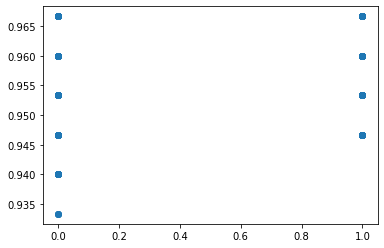

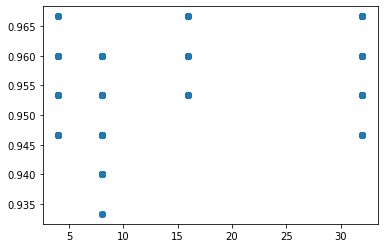

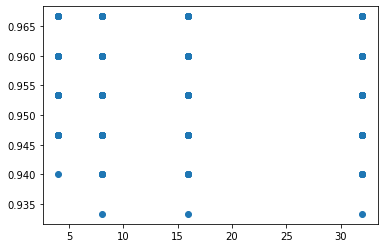

In [18]:
import matplotlib.pyplot as plt
data_lists = [uses_bootstrap, number_estimators, max_depth]
for data_list in data_lists:
  plt.scatter(x=np.array(data_list).T[0], y=np.array(data_list).T[1])
  plt.show()